In [1]:
face_detection_cascade_drive_id = "1PPO2MCttsmSqyB-vKh5C7SumwFKuhgyj"

In [3]:
import gdown
import cv2

In [33]:
gdown.download(id=face_detection_cascade_drive_id,output="case.xml")

Downloading...
From: https://drive.google.com/uc?id=1PPO2MCttsmSqyB-vKh5C7SumwFKuhgyj
To: /content/case.xml
100%|██████████| 930k/930k [00:00<00:00, 88.8MB/s]


'case.xml'

In [38]:
face_detect_cas = cv2.CascadeClassifier("case.xml",)

In [2]:
!wget https://image.shutterstock.com/image-photo/closeup-portrait-yong-woman-casual-260nw-1554086789.jpg -O "input.jpg"

--2023-09-23 19:25:44--  https://image.shutterstock.com/image-photo/closeup-portrait-yong-woman-casual-260nw-1554086789.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 216.137.39.108, 216.137.39.34, 216.137.39.30, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|216.137.39.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16321 (16K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  15.94K  --.-KB/s    in 0.001s  

2023-09-23 19:25:44 (21.0 MB/s) - ‘input.jpg’ saved [16321/16321]



In [48]:
imarr = cv2.imread("input.jpg")
result = face_detect_cas.detectMultiScale(imarr,minSize=[100,120])

In [49]:
result

()

In [5]:
from google.colab.patches import cv2_imshow

In [18]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 12.9 MB/s eta 0:00:00


In [52]:
from ultralytics import YOLO

In [54]:
model = YOLO("yolov8s.pt ")

100%|██████████| 21.5M/21.5M [00:00<00:00, 124MB/s] 



image 1/1 /content/input.jpg: 480x640 1 person, 743.7ms
Speed: 6.2ms preprocess, 743.7ms inference, 24.3ms postprocess per image at shape (1, 3, 480, 640)


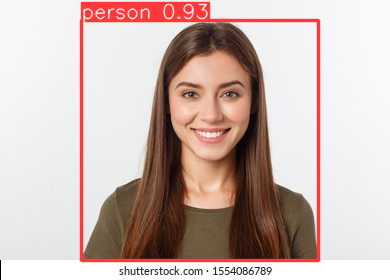

In [55]:
cv2_imshow(model.predict("input.jpg")[0].plot())

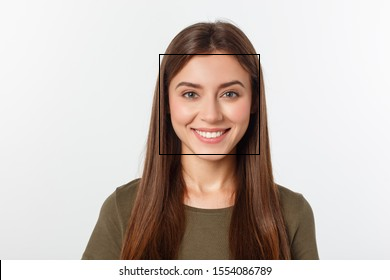

In [12]:
cv2_imshow(cv2.rectangle(imarr,[159,  54],[259,154],(0,0,0)))

In [31]:
imarr[54:154,159:259] = cv2.GaussianBlur(imarr[54:154,159:259],ksize=(9,9),sigmaX=200.0)

In [ ]:
[159,  54],[259,154]

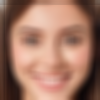

In [30]:
cv2_imshow(cv2.GaussianBlur(imarr[54:154,159:259],ksize=(9,9),sigmaX=200.0))

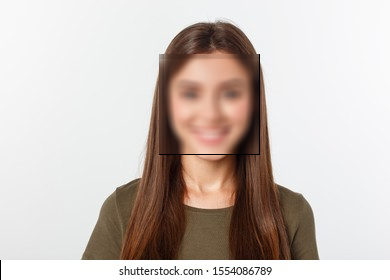

In [32]:
cv2_imshow(imarr)

In [1]:
classes = ["face"]

In [2]:
data={
    "train":"images/train",
    "val":"images/val",
    "nc":len(classes),
    "names":classes
}

In [3]:
import yaml
with open("config.yaml","w") as f:
  yaml.safe_dump(data,f)

In [4]:
img_path = "/content/drive/MyDrive/face-detection/images"

In [5]:
import glob,shutil

In [8]:
all_txts = glob.glob(img_path+"/*.txt")

In [9]:
all_txts.remove('/content/drive/MyDrive/face-detection/images/classes.txt')

In [10]:
TR_R=0.9
TE_R=0.1
train_txts=all_txts[:int(len(all_txts)*TR_R)]
test_txts=all_txts[int(len(all_txts)*TR_R):]

In [29]:
shutil.rmtree("datasets")

In [30]:
import os
os.makedirs("images/train")
os.makedirs("labels/train")
os.makedirs("images/val")
os.makedirs("labels/val")

In [16]:
all([
   all( [os.path.isfile(txt),
    os.path.isfile(os.path.splitext(txt)[0]+".jpg")]

    )
    for txt in test_txts
])

True

In [ ]:
[
   ( shutil.copy(txt,"labels/train"),
    shutil.copy(os.path.splitext(txt)[0]+".jpg","images/train")

    )
    for txt in train_txts
]


[
   ( shutil.copy(txt,"labels/val"),
    shutil.copy(os.path.splitext(txt)[0]+".jpg","images/val")

    )
    for txt in test_txts
]

In [3]:
from ultralytics import YOLO

In [33]:
model = YOLO("yolov8s.pt")

In [34]:
os.makedirs("datasets")

In [35]:
shutil.move("images","data")
shutil.move("labels","data")

'data/labels'

In [38]:
model.train(data="config.yaml",epochs=20)

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d89a8449330>
fitness: 0.986187258513932
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.98521])
names: {0: 'face'}
plot: True
results_dict: {'metrics/precision(B)': 1.0, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.9852080650154799, 'fitness': 0.986187258513932}
save_dir: PosixPath('runs/detect/train5')
speed: {'preprocess': 0.1503427823384603, 'inference': 2.806891997655233, 'loss': 0.0006953875223795573, 'postprocess': 0.687628984451294}

In [ ]:
!pip install supervision

In [4]:
model = YOLO("/content/runs/detect/train5/weights/best.pt")


In [7]:
result = model.predict("input.jpg")[0]


image 1/1 /content/input.jpg: 480x640 1 face, 16.1ms
Speed: 3.6ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


In [14]:
import cv2
imarr = cv2.imread("input.jpg")
def process(imarr,_):
  result = model.predict(imarr)
  for data in result[0].boxes.data:
    x1,y1,x2,y2 , _ , _ = data
    cv2.rectangle(imarr,( int(x1),int(y1)) , ( int(x2),int(y2)) , (0,0,0)  )
  return imarr

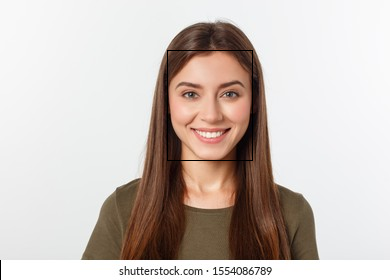

In [13]:
cv2_imshow(imarr)

In [15]:
import supervision as sv
sv.process_video("production_id_4053048 (2160p).mp4","output.mp4",process)


0: 384x640 1 face, 111.4ms
Speed: 3.4ms preprocess, 111.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 11.2ms
Speed: 3.2ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 11.2ms
Speed: 3.2ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 faces, 11.1ms
Speed: 3.3ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 faces, 11.1ms
Speed: 3.4ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 11.7ms
Speed: 6.8ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 face, 11.1ms
Speed: 3.2ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 faces, 11.2ms
Speed: 3.3ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0:

In [19]:
cap = cv2.VideoCapture("output.mp4")

In [20]:
cap.get(cv2.CAP_PROP_FPS)

25.0

In [25]:
import shutil
shutil.copy("runs/detect/train5/weights/best.pt","drive/MyDrive/face-detection")

'drive/MyDrive/face-detection/best.pt'